<a href="https://colab.research.google.com/github/NckolasGomes6696/IPet/blob/main/Trabalho_sobre_Interpola%C3%A7%C3%A3o_Polinomial%2C_Ajustes_de_Curvas_e_Integra%C3%A7%C3%A3o_Num%C3%A9rica_126696_%26_142369_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

exercicio 1

In [ ]:
# Dados experimentais
tempo_experimental = np.array([0, 10, 20, 30, 40, 50])
temperatura_experimental = np.array([20.0, 23.5, 30.0, 33.2, 40.1, 45.2])

In [ ]:
# Tempo para previsão
tempo_previsao = 25

interpolação de lagrange

In [ ]:
# Função para interpolação de Lagrange
def lagrange_interpolacao(x, y, ponto):
    resultado = 0
    for i in range(len(x)):
        termo = y[i]
        for j in range(len(x)):
            if j != i:
                termo *= (ponto - x[j]) / (x[i] - x[j])
        resultado += termo
    return resultado

In [ ]:
# Realiza a interpolação de Lagrange para o tempo de previsão
temperatura_prevista = lagrange_interpolacao(tempo_experimental, temperatura_experimental, tempo_previsao)


In [ ]:
# Imprime o resultado
print(f"A temperatura prevista para t = {tempo_previsao}s é {temperatura_prevista:.2f} ºC.")

A temperatura prevista para t = 25s é 31.58 ºC.


interpolação de newton

In [ ]:
# Função para interpolação de Newton
def coeficientes_newton(x, y):
    n = len(x)
    F = np.zeros((n, n))
    F[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            F[i, j] = (F[i + 1, j - 1] - F[i, j - 1]) / (x[i + j] - x[i])

    return F[0, :]

def newton_interpolacao(coeficientes, x, ponto):
    n = len(coeficientes)
    resultado = coeficientes[0]

    for i in range(1, n):
        termo = coeficientes[i]
        for j in range(i):
            termo *= (ponto - x[j])
        resultado += termo

    return resultado


In [ ]:
# Experimente diferentes ordens de polinômios
ordens = [1, 2, 3, 4, 5]


31.584375


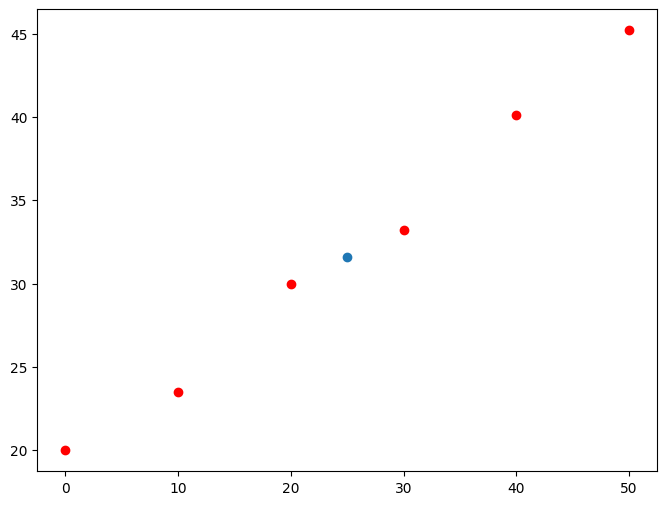

In [ ]:
# Inicialização do gráfico
plt.figure(figsize=(8, 6))
plt.scatter(tempo_experimental, temperatura_experimental, color='red', label='Dados Conhecidos')

for ordem in ordens:
    coef = coeficientes_newton(tempo_experimental[:ordem + 1], temperatura_experimental[:ordem + 1])

    # Estimar a temperatura no tempo de previsão
    temp_estimada = newton_interpolacao(coef, tempo_experimental[:ordem + 1], tempo_previsao)

    # Adicionar o ponto estimado ao gráfico
plt.scatter(tempo_previsao, temp_estimada, label=f'Ordem {ordem}')
print(temp_estimada)


minimos quadrados


In [ ]:
# Função para ajuste polinomial
def ajuste_minimos_quadrados(x, y, grau):
    coeficientes = np.polyfit(x, y, grau)
    return np.poly1d(coeficientes)

In [ ]:
# Graus dos polinômios a serem testados
graus = [1, 2, 3, 4]

A temperatura prevista para t = 25s (Grau 1) é 32.00 ºC.
A temperatura prevista para t = 25s (Grau 2) é 31.50 ºC.
A temperatura prevista para t = 25s (Grau 3) é 31.50 ºC.
A temperatura prevista para t = 25s (Grau 4) é 31.58 ºC.


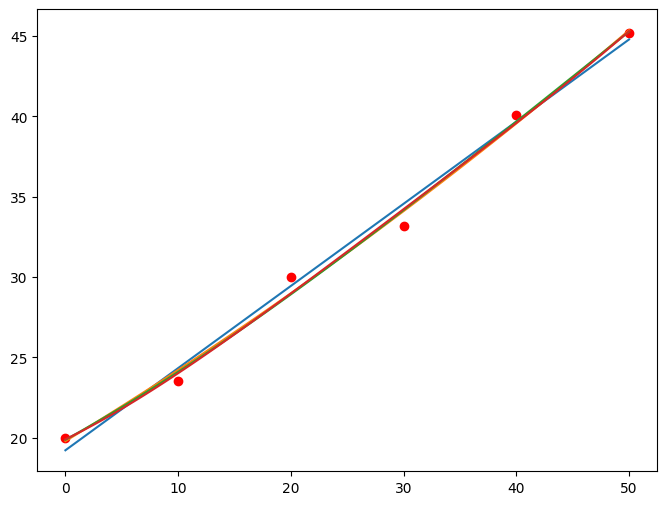

In [ ]:
# Inicialização do gráfico
plt.figure(figsize=(8, 6))
plt.scatter(tempo_experimental, temperatura_experimental, color='red', label='Dados Conhecidos')

for grau in graus:
    # Ajuste polinomial
    ajuste_polinomial = ajuste_minimos_quadrados(tempo_experimental, temperatura_experimental, grau)

    # Plotar curva ajustada
    tempo_ajuste = np.linspace(min(tempo_experimental), max(tempo_experimental), 100)
    temperatura_ajuste = ajuste_polinomial(tempo_ajuste)
    plt.plot(tempo_ajuste, temperatura_ajuste, label=f'Grau {grau}')

    # Estimar a temperatura no tempo de previsão
    temp_estimada = ajuste_polinomial(tempo_previsao)
    print(f"A temperatura prevista para t = {tempo_previsao}s (Grau {grau}) é {temp_estimada:.2f} ºC.")


comparação/avaliação

In [ ]:
# Avaliação de métodos
ordens_interp = [1, 2, 3, 4]
ordens_ajuste = [1, 2, 3, 4]

In [ ]:
# Função para interpolação de Newton
def coeficientes_newton(x, y):
    n = len(x)
    F = np.zeros((n, n))
    F[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            F[i, j] = (F[i + 1, j - 1] - F[i, j - 1]) / (x[i + j] - x[i])

    return F[0, :]

def newton_interpolacao(coeficientes, x, ponto):
    n = len(coeficientes)
    resultado = coeficientes[0]

    for i in range(1, n):
        termo = coeficientes[i]
        for j in range(i):
            termo *= (ponto - x[j])
        resultado += termo

    return resultado


In [ ]:
# Função para ajuste polinomial
def ajuste_minimos_quadrados(x, y, grau):
    coeficientes = np.polyfit(x, y, grau)
    return np.poly1d(coeficientes)


In [ ]:
for ordem_interp in ordens_interp:
    # Interpolação polinomial
    coef_interp = coeficientes_newton(tempo_experimental[:ordem_interp + 1], temperatura_experimental[:ordem_interp + 1])
    temp_interp = newton_interpolacao(coef_interp, tempo_experimental[:ordem_interp + 1], tempo_previsao)

    # Mínimos quadrados
    for ordem_ajuste in ordens_ajuste:
        ajuste_polinomial = ajuste_minimos_quadrados(tempo_experimental, temperatura_experimental, ordem_ajuste)
        temp_ajuste = ajuste_polinomial(tempo_previsao)

        # Cálculo dos erros absolutos
        erro_interp = np.abs(temp_interp - temperatura_experimental[3])
        erro_ajuste = np.abs(temp_ajuste - temperatura_experimental[3])

        # Imprime resultados
        print(f"Interpolação (Ordem {ordem_interp}) - Erro Absoluto: {erro_interp:.2f} ºC")
        print(f"Ajuste Mínimos Quadrados (Grau {ordem_ajuste}) - Erro Absoluto: {erro_ajuste:.2f} ºC")
        print("="*50)


Interpolação (Ordem 1) - Erro Absoluto: 4.45 ºC
Ajuste Mínimos Quadrados (Grau 1) - Erro Absoluto: 1.20 ºC
Interpolação (Ordem 1) - Erro Absoluto: 4.45 ºC
Ajuste Mínimos Quadrados (Grau 2) - Erro Absoluto: 1.70 ºC
Interpolação (Ordem 1) - Erro Absoluto: 4.45 ºC
Ajuste Mínimos Quadrados (Grau 3) - Erro Absoluto: 1.70 ºC
Interpolação (Ordem 1) - Erro Absoluto: 4.45 ºC
Ajuste Mínimos Quadrados (Grau 4) - Erro Absoluto: 1.62 ºC
Interpolação (Ordem 2) - Erro Absoluto: 1.17 ºC
Ajuste Mínimos Quadrados (Grau 1) - Erro Absoluto: 1.20 ºC
Interpolação (Ordem 2) - Erro Absoluto: 1.17 ºC
Ajuste Mínimos Quadrados (Grau 2) - Erro Absoluto: 1.70 ºC
Interpolação (Ordem 2) - Erro Absoluto: 1.17 ºC
Ajuste Mínimos Quadrados (Grau 3) - Erro Absoluto: 1.70 ºC
Interpolação (Ordem 2) - Erro Absoluto: 1.17 ºC
Ajuste Mínimos Quadrados (Grau 4) - Erro Absoluto: 1.62 ºC
Interpolação (Ordem 3) - Erro Absoluto: 0.79 ºC
Ajuste Mínimos Quadrados (Grau 1) - Erro Absoluto: 1.20 ºC
Interpolação (Ordem 3) - Erro Absolut

interpolação newton =  31.88671875
minimos quadrados =  31.584375000000012


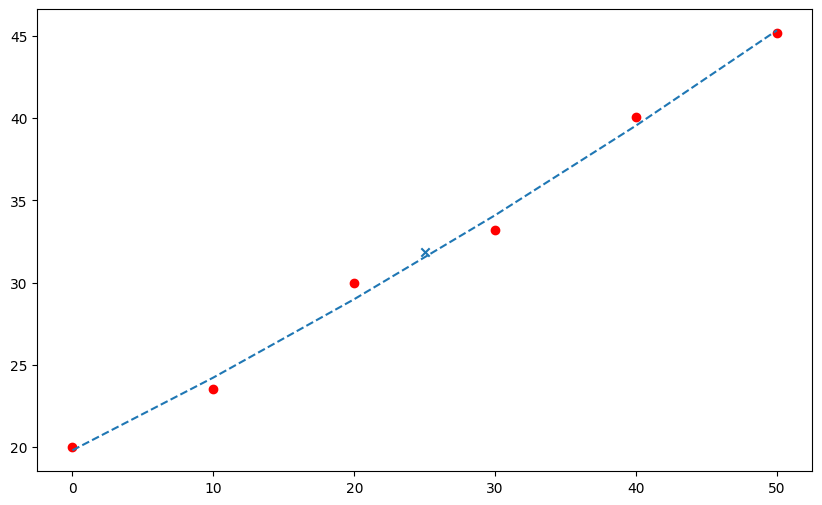

In [ ]:
# Gráfico de comparação
plt.figure(figsize=(10, 6))
plt.scatter(tempo_experimental, temperatura_experimental, color='red', label='Dados Conhecidos')
plt.plot(tempo_experimental, ajuste_minimos_quadrados(tempo_experimental, temperatura_experimental, 2)(tempo_experimental), label='Ajuste Mínimos Quadrados (Grau 2)', linestyle='--')
plt.scatter(tempo_previsao, newton_interpolacao(coef_interp, tempo_experimental[:ordem_interp + 1], tempo_previsao), label=f'Interpolação (Ordem {ordem_interp})', marker='x')
print("interpolação newton = ", temp_interp)
print("minimos quadrados = ", temp_ajuste)

Interpolação:
Vantagens:

Pode ser mais simples e direta de implementar.
Geralmente funciona bem para pontos próximos aos dados conhecidos.
Desvantagens:

Pode sofrer de fenômeno de oscilação (Runge's Phenomenon) em ordens elevadas.
Extrapolar além dos dados conhecidos pode levar a resultados imprecisos.
Mínimos Quadrados:
Vantagens:

Flexibilidade para ajustar polinômios de diferentes graus.
Menos sensível a flutuações nos dados experimentais.
Desvantagens:

Pode ser mais complexo de implementar.
Sensível à escolha do grau do polinômio.
Ambos os métodos têm seu lugar dependendo do contexto específico e da natureza dos dados experimentais. Experimente diferentes abordagens para avaliar qual se adequa melhor ao seu problema.

exercicio 2:

Múltipla Aplicação do Método do Trapézio

In [ ]:
# Função de densidade de potência elétrica
def P(t):
    return 0.2 * t**3 - 1.5 * t**2 + 4 * np.sin(t) + 2 * np.cos(t) + 10


In [ ]:
# Múltiplas aplicações do método do trapézio
def trapezoidal_rule_multiple_segments(func, a, b, num_segments):
    h = (b - a) / num_segments
    integral_sum = 0.5 * (func(a) + func(b))

    for i in range(1, num_segments):
        x_i = a + i * h
        integral_sum += func(x_i)

    integral_sum *= h
    return integral_sum


In [ ]:
# Intervalo de integração
a = 0
b = 6


In [ ]:
# Número de segmentos
num_segments = 6


In [ ]:
# Aplicação do método do trapézio com múltiplas aplicações
estimated_energy_trap = trapezoidal_rule_multiple_segments(P, a, b, num_segments)


In [ ]:
# Exibição do resultado
print(f"A quantidade total de energia consumida no intervalo de 0 a 6 segundos é aproximadamente: {estimated_energy_trap:.6f}")

A quantidade total de energia consumida no intervalo de 0 a 6 segundos é aproximadamente: 16.734349


Múltipla Aplicação da Regra de Simpson 1/3

In [ ]:
def P(t):
    return 0.2 * t**3 - 1.5 * t**2 + 4 * np.sin(t) + 2 * np.cos(t) + 10


In [ ]:
# Múltiplas aplicações da regra de Simpson 1/3
def simpsons_rule_multiple_segments(func, a, b, num_segments):
    h = (b - a) / num_segments
    integral_sum = func(a) + func(b)

    for i in range(1, num_segments):
        x_i = a + i * h
        if i % 2 == 0:
            integral_sum += 2 * func(x_i)
        else:
            integral_sum += 4 * func(x_i)

    integral_sum *= h / 3
    return integral_sum

In [ ]:
# Intervalo de integração
a = 0
b = 6

In [ ]:
# Número de segmentos
num_segments = 6


In [ ]:
# Aplicação da regra de Simpson 1/3 com múltiplas aplicações
estimated_energy_simpson_1_3 = simpsons_rule_multiple_segments(P, a, b, num_segments)


In [ ]:
# Exibição do resultado
print(f"A quantidade total de energia consumida no intervalo de 0 a 6 segundos é aproximadamente: {estimated_energy_simpson_1_3:.6f}")

A quantidade total de energia consumida no intervalo de 0 a 6 segundos é aproximadamente: 16.397973


Aplicação da Regra de Simpson 3/8

In [ ]:
# Função de densidade de potência elétrica
def P(t):
    return 0.2 * t**3 - 1.5 * t**2 + 4 * np.sin(t) + 2 * np.cos(t) + 10


In [ ]:
# Regra de Simpson 3/8 com uma única aplicação
def simpsons_rule_3_8_single_application(func, a, b):
    h = (b - a) / 3
    integral_sum = func(a) + 3 * func(a + h) + 3 * func(a + 2 * h) + func(b)
    integral_sum *= 3 * h / 8
    return integral_sum


In [ ]:
# Intervalo de integração
a = 0
b = 6


In [ ]:
# Aplicação da regra de Simpson 3/8 com uma única aplicação
estimated_energy_simpson_3_8 = simpsons_rule_3_8_single_application(P, a, b)


In [ ]:
# Exibição do resultado
print(f"A quantidade total de energia consumida no intervalo de 0 a 6 segundos é aproximadamente: {estimated_energy_simpson_3_8:.6f}")

A quantidade total de energia consumida no intervalo de 0 a 6 segundos é aproximadamente: 15.460406


Comparação e Avaliação/Análise de Erros

In [ ]:
# Valor real obtido analiticamente
real_value = 16.400488

In [ ]:
# Resultados obtidos pelos métodos
print("m.trapezoidal = ",estimated_energy_trap)
print("m.simpson 1/3 = ",estimated_energy_simpson_1_3)
print("m.simpson 3/8 = ",estimated_energy_simpson_3_8)


m.trapezoidal =  16.734348963782367
m.simpson 1/3 =  16.39797321737514
m.simpson 3/8 =  15.460406260690158


In [ ]:
# Cálculo dos erros absolutos
error_trap_absolute = abs(real_value - estimated_energy_trap)
error_simpson_1_3_absolute = abs(real_value - estimated_energy_simpson_1_3)
error_simpson_3_8_absolute = abs(real_value - estimated_energy_simpson_3_8)


In [ ]:
# Cálculo dos erros relativos percentuais
error_trap_relative_percent = (error_trap_absolute / real_value) * 100
error_simpson_1_3_relative_percent = (error_simpson_1_3_absolute / real_value) * 100
error_simpson_3_8_relative_percent = (error_simpson_3_8_absolute / real_value) * 100


In [ ]:
# Exibição dos resultados em uma tabela
print(f"{'Método':<25}{'Energia Estimada':<20}{'Erro Absoluto':<20}{'Erro Relativo (%)':<25}")
print("-" * 90)
print(f"{'Trapézio':<25}{estimated_energy_trap:<20.6f}{error_trap_absolute:<20.6f}{error_trap_relative_percent:<25.6f}")
print(f"Simpson 1/3 (múltiplas):{'':<6}{estimated_energy_simpson_1_3:<20.6f}{error_simpson_1_3_absolute:<20.6f}{error_simpson_1_3_relative_percent:<25.6f}")
print(f"Simpson 3/8 (única):{'':<10}{estimated_energy_simpson_3_8:<20.6f}{error_simpson_3_8_absolute:<20.6f}{error_simpson_3_8_relative_percent:<25.6f}")

Método                   Energia Estimada    Erro Absoluto       Erro Relativo (%)        
------------------------------------------------------------------------------------------
Trapézio                 16.734349           0.333861            2.035677                 
Simpson 1/3 (múltiplas):      16.397973           0.002515            0.015334                 
Simpson 3/8 (única):          15.460406           0.940082            5.732035                 
